# Compaines profit (Linear Regression)

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [22]:
df=pd.read_csv("1000_Companies.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [24]:
df.shape

(1000, 5)

In [25]:
df.isnull().values.any()

False

In [26]:
no_zero=['Marketing Spend',"R&D Spend"]
for column in no_zero:
    df[column]=df[column].replace(0,np.NaN)
    min=int(df[column].min(skipna=True))
    df[column]=df[column].replace(np.NaN,min)
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,81670.01120,122963.897612,226210.767419,119546.164656
std,46535.66994,12613.927535,91564.335915,42888.633848
min,542.00000,51283.140000,1903.000000,14681.400000
25%,43084.50000,116640.684850,150969.584600,85943.198543
50%,79936.00000,122421.612150,224517.887350,117641.466300
75%,124565.50000,129139.118000,308189.808525,155577.107425
max,165349.20000,321652.140000,471784.100000,476485.430000


In [27]:
x=df.iloc[:,0:3:2]
x

,R&D Spend,Marketing Spend
0,165349.20,471784.1000
1,162597.70,443898.5300
2,153441.51,407934.5400
3,144372.41,383199.6200
4,142107.34,366168.4200
...,...,...
995,54135.00,173232.6695
996,134970.00,329204.0228
997,100275.47,227142.8200
998,128456.23,281692.3200


In [28]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,81670.01120,122963.897612,226210.767419,119546.164656
std,46535.66994,12613.927535,91564.335915,42888.633848
min,542.00000,51283.140000,1903.000000,14681.400000
25%,43084.50000,116640.684850,150969.584600,85943.198543
50%,79936.00000,122421.612150,224517.887350,117641.466300
75%,124565.50000,129139.118000,308189.808525,155577.107425
max,165349.20000,321652.140000,471784.100000,476485.430000


In [29]:
y=df["Profit"]
y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [31]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [32]:
y_pred = model.predict(x_test)


In [33]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 0.89810661 -0.01803206]
Intercept: 50120.3394506372
Mean squared error (MSE): 416176819.24
Coefficient of determination (R^2): 0.81


C:\Users\omart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

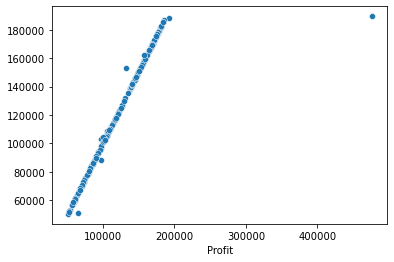

In [34]:
sns.scatterplot(y_test, y_pred)


C:\Users\omart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Profit'>

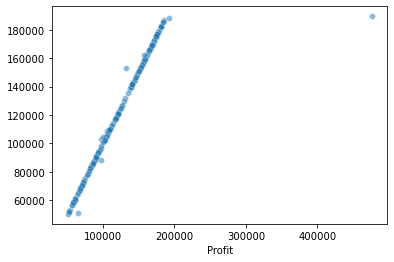

In [35]:
sns.scatterplot(y_test, y_pred, alpha=0.5)


In [36]:
y_test

993     89012.02672
859     87654.55773
298     94093.35179
553    175396.26160
672     83356.61784
           ...     
679    164779.98270
722    168402.17810
215    145976.17530
653    141082.79440
150    108917.01570
Name: Profit, Length: 200, dtype: float64

In [37]:
y_pred

array([ 89281.46576062,  87909.66030036,  94416.45561928, 176578.01997258,
        83566.3291001 , 110891.07086124, 108512.01885057,  90974.42391752,
       165243.57446993,  53377.97581321,  66302.64514097, 151311.41806051,
       126631.00614832,  58644.18935287, 177536.29817459,  75421.82770212,
       118797.29768024, 164518.39096623, 153216.6989546 , 182821.50461392,
       103436.569756  ,  85135.83339698, 181921.93174471,  83601.72496181,
       104588.88088709, 100793.75388377,  50984.32083926,  56875.25959171,
        68260.64060112, 188146.00226166, 121343.20976596, 111348.62711864,
       101752.03208578, 138627.61325314,  63304.35667852, 108464.29606321,
       186791.02098456, 172314.11363318, 175535.13702903, 118217.15087656,
        96966.68427372, 165401.56087611, 107323.85867378,  50331.3417836 ,
       117052.54070229,  57934.54549549, 159209.01174206,  78850.04638396,
       160528.15506934, 131765.13269143, 185833.60609629, 175499.74116732,
        93260.47858065,  

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

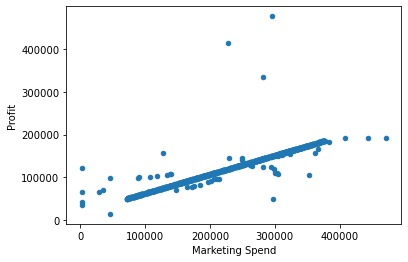

In [38]:
df.plot(kind="scatter",x='Marketing Spend',y="Profit")


<AxesSubplot:>

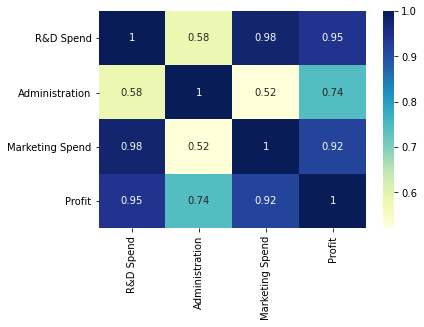

In [39]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
